In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [3]:
births = pd.read_csv('/births.csv')
births

year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]

In [4]:
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [25]:
births.isnull().any()

year         False
month        False
day          False
gender       False
births       False
decade       False
dayofweek    False
dtype: bool

In [5]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

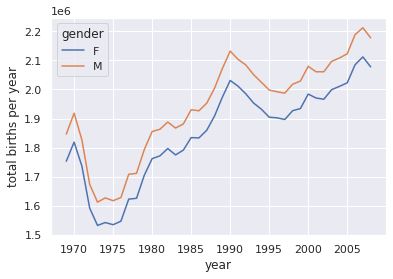

In [9]:
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [14]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(quartiles); print(mu); print(sig);

[4358.  4814.  5289.5]
4814.0
689.31


In [16]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
print(births)

       year  month   day gender  births  decade
0      1969      1   1.0      F    4046    1960
1      1969      1   1.0      M    4440    1960
2      1969      1   2.0      F    4454    1960
3      1969      1   2.0      M    4548    1960
4      1969      1   3.0      F    4548    1960
...     ...    ...   ...    ...     ...     ...
15062  1988     12  29.0      M    5944    1980
15063  1988     12  30.0      F    5742    1980
15064  1988     12  30.0      M    6095    1980
15065  1988     12  31.0      F    4435    1980
15066  1988     12  31.0      M    4698    1980

[14610 rows x 6 columns]


In [17]:
births['day'] = births['day'].astype(int)

In [18]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

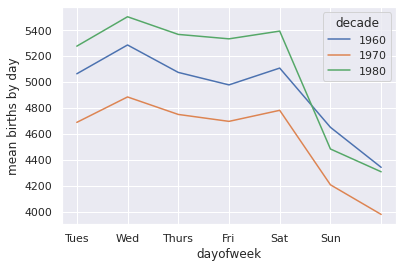

In [20]:
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [22]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [23]:
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
births_by_date.head()

<ipython-input-23-7f32df19d6c5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625

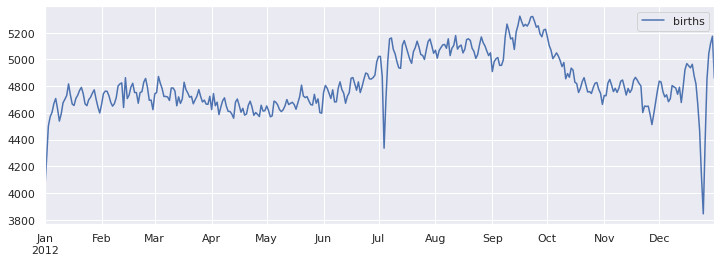

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [28]:
births

year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960          2
1969-01-01  1969      1    1      M    4440    1960          2
1969-01-02  1969      1    2      F    4454    1960          3
1969-01-02  1969      1    2      M    4548    1960          3
1969-01-03  1969      1    3      F    4548    1960          4
...          ...    ...  ...    ...     ...     ...        ...
1988-12-29  1988     12   29      M    5944    1980          3
1988-12-30  1988     12   30      F    5742    1980          4
1988-12-30  1988     12   30      M    6095    1980          4
1988-12-31  1988     12   31      F    4435    1980          5
1988-12-31  1988     12   31      M    4698    1980          5

[14610 rows x 7 columns]